## KMeans clustering, elbow medthod

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [3]:
df= sns.load_dataset('iris')

In [6]:
del df['sepal_length']

In [8]:
 del df['sepal_width']

In [9]:
df

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
df['species']= df['species'].map({'setosa':1, 'versicolor':2, 'virginica':3})

In [12]:
df

,petal_length,petal_width,species
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,3
146,5.0,1.9,3
147,5.2,2.0,3
148,5.4,2.3,3


In [14]:
from sklearn.preprocessing import MinMaxScaler ## We are scaling the values using minmaxscaler

In [25]:
scaler = MinMaxScaler()
scaled_length= scaler.fit_transform(df[['petal_length']])
scaled_width= scaler.fit_transform(df[['petal_width']])

In [28]:
df['petal_length']=scaled_length
df['petal_width']=scaled_width

In [29]:
df

,petal_length,petal_width,species
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,3
146,0.677966,0.750000,3
147,0.711864,0.791667,3
148,0.745763,0.916667,3


In [33]:
## we find he value of k for clustering
krng= range(1,11)
sum_sqr_er=[]
for k in krng:
    km= KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sum_sqr_er.append(km.inertia_)
    

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
sum_sqr_er #sum of squared error

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6795297632254395,
 0.5656776810037092,
 0.4869986050264928,
 0.4132667782512474,
 0.3716036063213151]

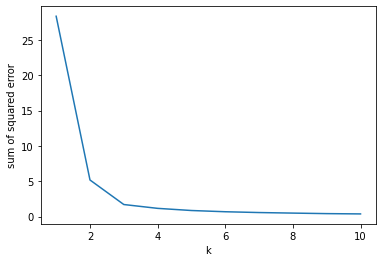

In [58]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(krng,sum_sqr_er)

## here we find that an elbow is made at k=3 ,so we take k=3 for the model

In [45]:
df1= df[df.species==1]
df2= df[df.species==2]
df3= df[df.species==3]

In [47]:
df1.head()

,petal_length,petal_width,species
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


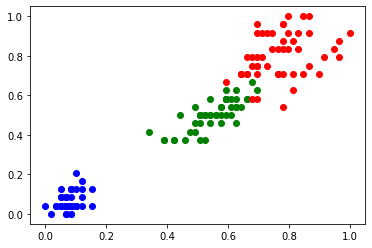

In [50]:
plt.scatter(df1['petal_length'],df1['petal_width'],color='blue')
plt.scatter(df2['petal_length'],df2['petal_width'],color='green')
plt.scatter(df3['petal_length'],df3['petal_width'],color='red')

In [55]:
km= KMeans(n_clusters=3) ## k=3
y_predicted=km.fit_predict(df)

In [56]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])